# Introduction

Bank lenders face high volumes of loan approval requests every day and need a streamlined way to process them. We wanted to explore the possibility of using machine learning to automate loan approval request handling. To do so, we used a synthetic loan dataset and experimented with a few different models and techniques (K Nearest Neighbors, Logistic Regression, L1 Regularization, etc.). We treat false negatives and positives as equally bad, so we view test accuracy as a good performance metric.

## Exploratory Data Analysis

The dataset contains information on thousands of past loan applications, each row repesenting an individual applicant, with a mix of variables that may be related to loan approval status.

This data contains 20 features (1 id, 1 target), a distribution of 55/45 in target status, and includes real world financial approval logic (DTI ratios, Filed Defaults, etc...)  

This dataset provides a healthy combination of demographic, financial, and credit related information, making it suitable for understanding patterns in loan approvals. Before modeling, we will clean the dataset, address missing values, check for outliers, and explore some potential relationships between key features and loan outcomes.

### Here are a some plots and tables.

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

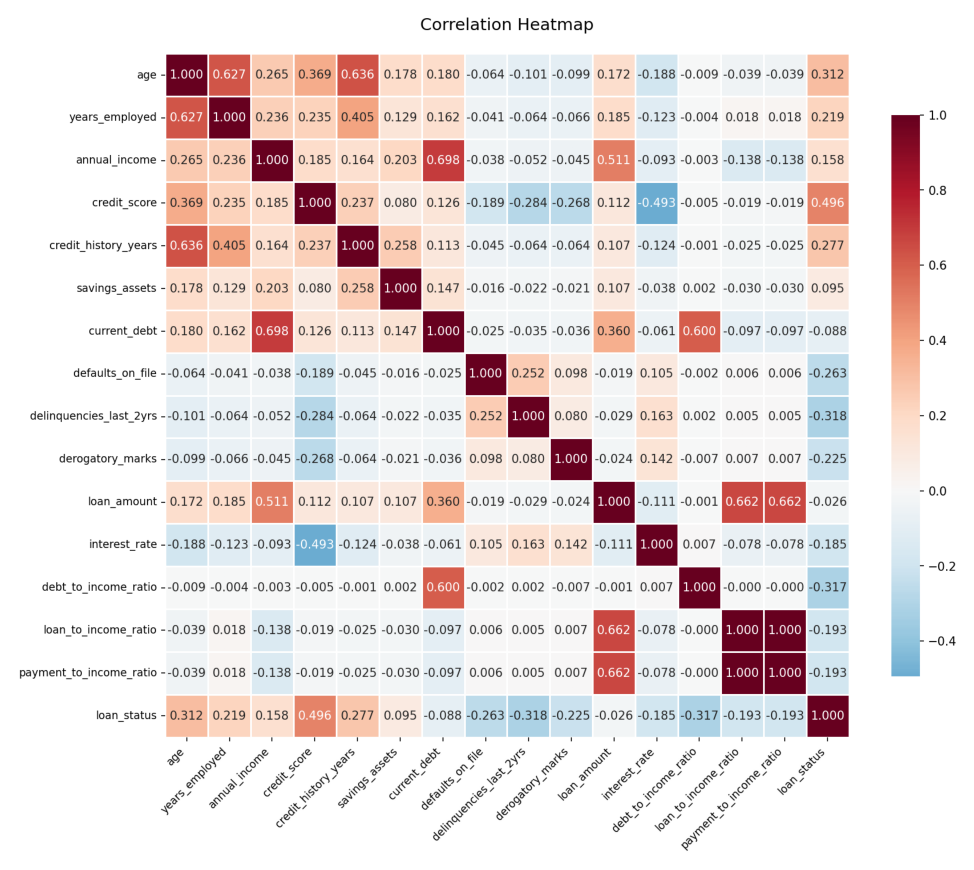

In [36]:
plt.figure(figsize=(10, 10))
plt.imshow(mpimg.imread("plots/correlation_heatmap.png"))
plt.tight_layout(pad=0)
plt.axis("off");

In [37]:
df = pd.read_csv("data/Loan_approval_data_2025.csv")
num_col = ["annual_income", "loan_amount", "credit_score", 
           "debt_to_income_ratio", "loan_to_income_ratio",
           "payment_to_income_ratio", "credit_history_years"]
average_ratios = df.groupby("loan_status")[num_col].median().T
average_ratios

loan_status,0,1
annual_income,37127.000,45708.000
loan_amount,26900.000,25400.000
credit_score,603.000,671.000
debt_to_income_ratio,0.329,0.232
loan_to_income_ratio,0.726,0.539
payment_to_income_ratio,0.242,0.180
credit_history_years,3.600,8.600


Some details and insights that may be useful or interesting gathered from this exploratory data analysis.

- Most approved lendee's are on average older, longer employed, and higher credit score
- Most approved lendee's have lower debt
- Most approved lendee's have a better DTI, LTI, and PTI ratio (lower = better)
- Credit card loans on average have a higher rate of denial
- Credit history on average approved lendee's is 2x higher than those denied
  

## Logistic Regression

Since the outcome we are trying to model is binary, $y_i \sim \operatorname{Bern}(p_i)$, then a model that is well-suited to fit the data would be the logistic regression, as it is catered to fit data whose output is binary in nature. The output of a logistic regression is a probability value $\hat \pi_i$, which is not binary in nature, so to convert it to a binary value, we will implement a cutoff threshold, $k$, we then define $\hat y_i = I\{\hat \pi_i \ge k\}$, where $I\{x\}$ is the indicator function. To prevent overfitting, we want to use a train/test split and we will quantify the performance of our model by using the classification rate on the test set, where we define the classification rate as $\frac{I\{y_i = \hat y_i\}}{n}$. Since the cutoff value is arbitrarily defined, we can implement a grid search approach to find an optimal cutoff threshold that will maximize our classification rate. We found a $10\%$ improvement in test accuracy (from ~$76\%$ to ~$86\%$) when switching from a naive to a regularized logistic regression model.

## Alternative Models: KNN

The goal of this part is to train a KNN classifier and compare it to our regularized logistic regression model from part 2. We will use the same train/test split and preprocessing for fair comparison. We will primarily use accuracy to compare the models' performance. In the end we find that the test model accuracy for our KNN model (0.868) is very similar to our Logistic Regression model (0.868). This shows that there isn't any predictive gain from using a KNN model. In practice, the Logistic Regression model provides more clear and interpretable coefficients, which allows us to directly assess how each factor influences a person's loan approval odds. Since KNN is a black-box model, and instance based, it offers little insight into fetaure importance.

## Analysis + Conclusion

In our experimentation with machine learning models, we used an 80/20 train-test split. The models we used had similar testing performance (~87%). Through our experimentation, we validated our original hypothesis that loan approvals/rejections followed some pattern, which we were able to accurately and consistently demonstrate with the machine learning models in our notebooks.

# Author Contributions

Henry worked on modeling/model selection for logistic regression. Lavin worked on data cleaning and exploratory data analysis. Aiden tested alternative models to Logistic Regression, like K-Nearest Neighbors. Kireeti worked on the conclusion, project description, README, Myst, GitHub Pages, makefile, binder, and .gitignore. The finishing touches and main.ipynb were done as a group.